Örnek Soru 1: Verilen bir diziyi kullanarak bir BST oluşturun ve ardından belirli bir anahtarı arayın. Eğer anahtar ağaçta bulunuyorsa True, bulunmuyorsa False döndürsün.

In [33]:
class TreeNode:
    def __init__(self, anahtar):
        self.değer = anahtar
        self.sol = None
        self.sağ = None

def ekle(kök, anahtar):
    if kök is None:
        return TreeNode(anahtar)
    else:
        if kök.değer < anahtar:
            kök.sağ = ekle(kök.sağ, anahtar)
        else:
            kök.sol = ekle(kök.sol, anahtar)
    return kök

def ara(kök, anahtar):
    # if kök is None or kök.değer == anahtar:
    if ((kök is None) or (kök.değer == anahtar)):
        return kök is not None
    if kök.değer < anahtar:
        return ara(kök.sağ, anahtar)
    return ara(kök.sol, anahtar)

# BST oluşturma
def bst_oluştur(dizi):
    if not dizi:
        return None
    kök = TreeNode(dizi[0])
    for anahtar in dizi[1:]:
        ekle(kök, anahtar)
    return kök

# Örnek kullanım
dizi = [8, 3, 10, 1, 6, 14, 4, 7, 13]
kök = bst_oluştur(dizi)
print(ara(kök, 6))  
print(ara(kök, 11))

True
False


Örnek Soru 2: Verilen bir diziyi kullanarak bir BST oluşturun ve ardından ağacın derinliğini hesaplayın.

In [34]:
def derinlik_hesapla(kök):
    if kök is None:
        return 0
    sol_derinlik = derinlik_hesapla(kök.sol)
    sağ_derinlik = derinlik_hesapla(kök.sağ)
    return max(sol_derinlik, sağ_derinlik) + 1

# Örnek kullanım
dizi = [8, 3, 10, 1, 6, 14, 4, 7, 13]
kök = bst_oluştur(dizi)
print(derinlik_hesapla(kök))  # Çıktı: 4


4


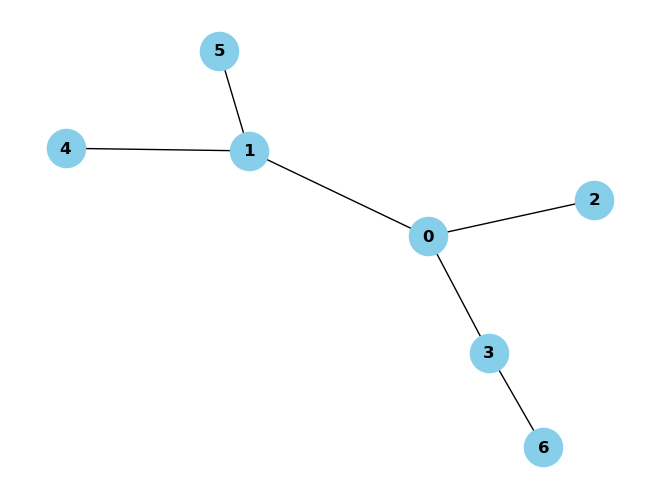

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(tree):
    G = nx.Graph()
    for parent, children in tree.items():
        G.add_node(str(parent))
        for child in children:
            G.add_edge(str(parent), str(child))

    pos = nx.spring_layout(G)  # Grafik çiziminde düzgün bir yerleşim için kullanılan yerleşim algoritması
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold', node_shape='o', linewidths=2)
    plt.show()

# Örnek kullanım
tree = {
    0: [1, 2, 3],
    1: [4, 5],
    2: [],
    3: [6],
    4: [],
    5: [],
    6: []
}
draw_graph(tree)


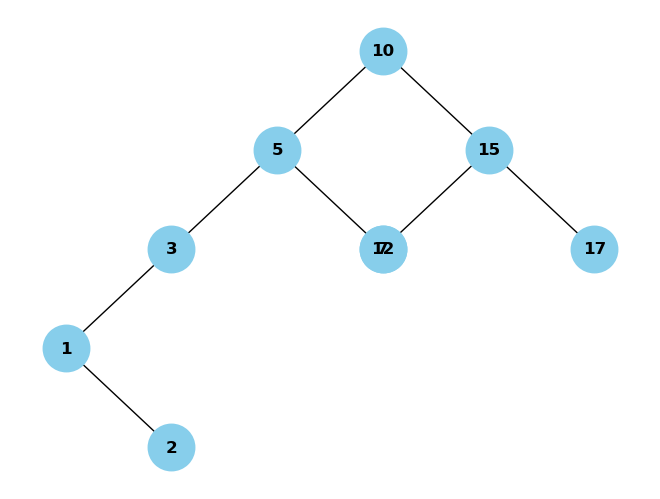

In [41]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, anahtar):
        self.değer = anahtar
        self.sol = None
        self.sağ = None

def ekle(kök, anahtar):
    if kök is None:
        return TreeNode(anahtar)
    else:
        if kök.değer < anahtar:
            kök.sağ = ekle(kök.sağ, anahtar)
        else:
            kök.sol = ekle(kök.sol, anahtar)
    return kök

def bst_oluştur(dizi):
    if not dizi:
        return None
    kök = TreeNode(dizi[0])
    for anahtar in dizi[1:]:
        ekle(kök, anahtar)
    return kök

def düğümleri_ekle(G, kök, parent=None, pos=None):
    if kök is not None:
        if pos is None:
            pos = {kök.değer: (0, 0)}
        else:
            yatay = pos[parent][0]
            düzey = pos[parent][1] - 1
            if kök.değer < parent:
                yatay -= 1
            else:
                yatay += 1
            pos[kök.değer] = (yatay, düzey)
        G.add_node(kök.değer, pos=pos[kök.değer])
        if parent is not None:
            G.add_edge(parent, kök.değer)
        düğümleri_ekle(G, kök.sol, kök.değer, pos)
        düğümleri_ekle(G, kök.sağ, kök.değer, pos)

def ağacı_çiz(dizi):
    G = nx.Graph()
    kök = bst_oluştur(dizi)
    düğümleri_ekle(G, kök)
    #pos = nx.spring_layout(G) # çizim denemesi
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold', node_shape='o', linewidths=8)
    plt.show()

# Örnek kullanım
dizi = [10, 5, 15, 3, 7, 12, 17, 1, 2]
ağacı_çiz(dizi)


Örnek Soru 3. Bir diziyi maksimum heap'e dönüştüren bir Python işlevi yazın.

In [45]:
def heapify(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1): #maks veya min heap yapısı burada oluşturuluyor
        max_heapify(arr, n, i)

def max_heapify(arr, n, i):
    largest = i
    left = 2 * i + 1      #sol çocuk hesaplama satırı
    right = 2 * i + 2     #sağ çocuk hesaplama satırı
    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        max_heapify(arr, n, largest)

# Örnek kullanım
arr = [4, 10, 3, 5, 1]
heapify(arr)
print("Maksimum heap:", arr)


Maksimum heap: [10, 5, 3, 4, 1]


Bu kod satırı, bir döngü başlatır ve maksimum veya minimum heap yapısını oluşturmak için kullanılırken dizinin yarısından başlayarak tüm düğümleri dolaşmayı sağlar. Bu döngü, dizinin ortasından başlayarak kök düğüme kadar olan düğümleri ele alır.

Kod satırının ayrıntılı açıklaması:

__range(n//2 - 1, -1, -1):__ Bu ifade, range() fonksiyonunu kullanarak bir sayı dizisi oluşturur. Başlangıç noktası n//2 - 1 olarak belirlenir. Burada n dizinin uzunluğunu temsil eder ve // operatörü tam bölme işlemini gerçekleştirir, böylece bu ifade, dizinin yarısını verir. -1 ise son indeksi temsil eder, çünkü Python indeksleri sıfırdan başlar. Son olarak, step parametresi -1 olarak belirlenir, böylece dizide geriye doğru ilerlenir.

Bu ifade, maksimum veya minimum heap yapısını oluşturmak için gerekli olan düğümleri uygun sırayla işlemek için kullanılır.

--------------------
__sol çocuk hesaplama satırı__

Bir heap ağacındaki bir düğümün sol çocuğunun dizideki indisini hesaplayan kod satırı

" i " indis, heap ağacındaki mevcut düğümün indisidir. Sol çocuk, genellikle 2*i + 1 indisine sahip olur. Çünkü bir heap ağacında, herhangi bir düğümün sol çocuğunun indisini bulmak için, o düğümün indisini (0'dan başlayarak) iki ile çarparız ve bir ekleriz.

Bu hesaplama, heap ağacının dizi temsili için genellikle kullanılır. Bu hesaplama, bir heap ağacındaki düğümlerin dizideki indislerini doğrudan bulmak için kullanılır.

------------------------------------------------
__sağ çocuk hesaplama satırı__

Bir heap ağacındaki bir düğümün sağ çocuğunun dizideki indisini hesaplayan kod satırı

i indis, heap ağacındaki mevcut düğümün indisidir. Sağ çocuk, genellikle 2*i + 2 indisine sahip olur. Çünkü bir heap ağacında, herhangi bir düğümün sağ çocuğunun indisini bulmak için, o düğümün indisini (0'dan başlayarak) iki ile çarparız ve iki ekleriz.

Bu hesaplama, heap ağacının dizi temsili için genellikle kullanılır. Bu hesaplama, bir heap ağacındaki düğümlerin dizideki indislerini doğrudan bulmak için kullanılır.

-----------------------------------

__max_heapify__ maksimum heap'i sürdürmek için düğümleri yeniden düzenlemek için kullanılan görevde bulunur. İşlev, bir diziyi ve bir dizinin boyutunu alır ve belirli bir indexteki düğümü kök düğüm ile karşılaştırarak maksimum heap özelliğini sağlamak için gerektiğinde düğümleri değiştirir.

if left < n and arr[left] > arr[largest]: largest = left: Sol çocuğun (indisi left) dizinin boyutundan küçük olup olmadığını ve sol çocuğun değerinin en büyük düğüm değerinden (largest) büyük olup olmadığını kontrol eder. Eğer sol çocuk dizinin sınırları içindeyse ve değeri en büyük düğüm değerinden büyükse, largest değişkeni sol çocuğun indisi (left) ile güncellenir.

if right < n and arr[right] > arr[largest]: largest = right: Benzer şekilde, sağ çocuğun (indisi right) dizinin boyutundan küçük olup olmadığını ve sağ çocuğun değerinin en büyük düğüm değerinden (largest) büyük olup olmadığını kontrol eder. Eğer sağ çocuk dizinin sınırları içindeyse ve değeri en büyük düğüm değerinden büyükse, largest değişkeni sağ çocuğun indisi (right) ile güncellenir.

if largest != i: arr[i], arr[largest] = arr[largest], arr[i]: Son olarak, eğer largest değişkeni (sol veya sağ çocuğun indisi) i (mevcut düğümün indisi) ile aynı değilse, largest ile i yer değiştirilir. Bu, mevcut düğümün değerinin en büyük olduğundan emin olur. Sonra, bu işlemin ardından, max_heapify işlevi rekürsif olarak largest indisi üzerinde tekrar çağrılır, bu da bu değişikliklerin alt ağaçlarda da uygulanmasını sağlar.

Örnek Soru 4. Verilen bir diziyi maksimum heap olarak sıralayan bir Python işlevi yazın.

In [46]:
def heap_sort(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        max_heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        max_heapify(arr, i, 0)

# Örnek kullanım
arr = [4, 10, 3, 5, 1]
heap_sort(arr)
print("Sıralanmış dizi (maksimum heap):", arr)


Sıralanmış dizi (maksimum heap): [1, 3, 4, 5, 10]


Örnek Soru 5. Verilen bir diziyi minimum heap'e dönüştüren bir Python işlevi yazın.

In [47]:
def heapify_min(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        min_heapify(arr, n, i)

def min_heapify(arr, n, i):
    smallest = i
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n and arr[left] < arr[smallest]:
        smallest = left
    if right < n and arr[right] < arr[smallest]:
        smallest = right
    if smallest != i:
        arr[i], arr[smallest] = arr[smallest], arr[i]
        min_heapify(arr, n, smallest)

# Örnek kullanım
arr = [4, 10, 3, 5, 1]
heapify_min(arr)
print("Minimum heap:", arr)

Minimum heap: [1, 4, 3, 5, 10]


In [49]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_heap_tree(tree):
    G = nx.Graph()
    for parent, children in tree.items():
        G.add_node(str(parent))
        for child in children:
            G.add_edge(str(parent), str(child))

    pos = nx.spring_layout(G)  # Grafik çiziminde düzgün bir yerleşim için kullanılan yerleşim algoritması
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold', node_shape='o', linewidths=2)
    plt.title("Heap Ağacı Grafiği")
    plt.show()


1. Maksimum Heap'e Dönüştürme İşlemi İçin Heap Ağacı Grafiği:

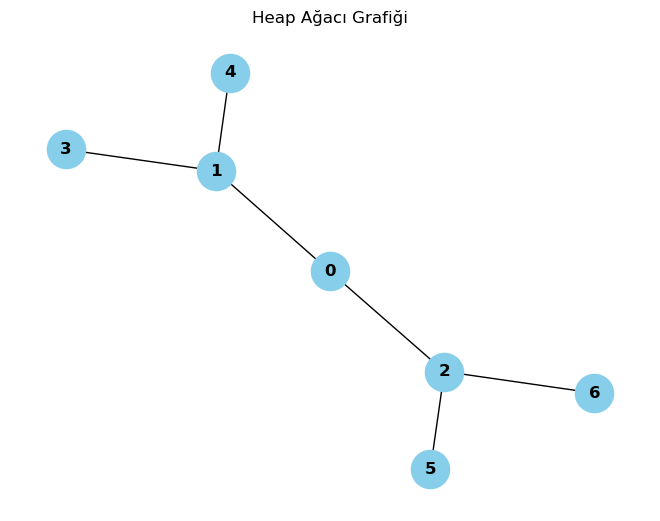

In [50]:
max_heap = {
    0: [1, 2],
    1: [3, 4],
    2: [5, 6]
}

draw_heap_tree(max_heap)


0 düğümü kök düğümü, 1 ve 2 düğümleri ise 0 düğümünün çocuk düğümleridir.

Örneğin, 0: 1,2 ifadesi, 0 indeksli düğümün çocuklarının 1 ve 2 olduğunu gösterir. 
Benzer şekilde, 1: 3,4 ifadesi, 1 indeksli düğümün çocuklarının 3 ve 4 olduğunu gösterir.

Bu sözlük yapıları, heap ağaçlarının düğümlerinin birbirleriyle olan ilişkilerini temsil eder. Özellikle, her düğümün çocuk düğümlerinin listesi bu yapıda tutulur. Bu sayede, her düğümün alt ağacı kolayca belirlenebilir. Örneğin, 1 indeksli düğümün alt ağacı, 1 düğümünün çocuklarının ve onların alt ağaçlarının birleşimi olarak belirlenir.

2. Maksimum Heap Olarak Sıralama İşlemi İçin Heap Ağacı Grafiği:

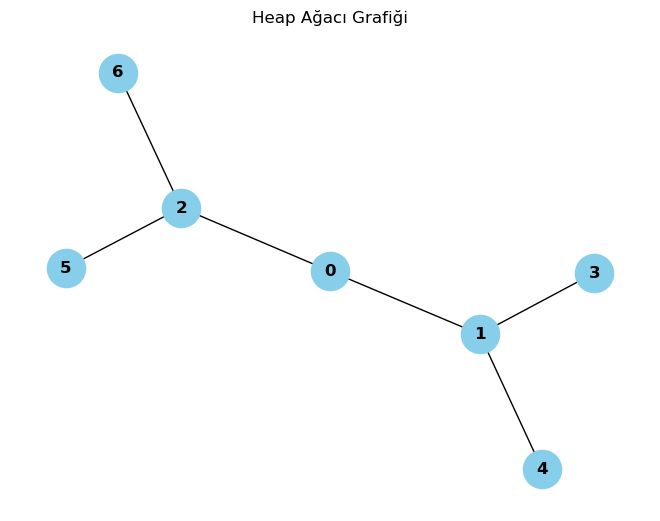

In [51]:
max_heap_sorted = {
    0: [1, 2],
    1: [3, 4],
    2: [5, 6]
}

draw_heap_tree(max_heap_sorted)


3. Minimum Heap'e Dönüştürme İşlemi İçin Heap Ağacı Grafiği:

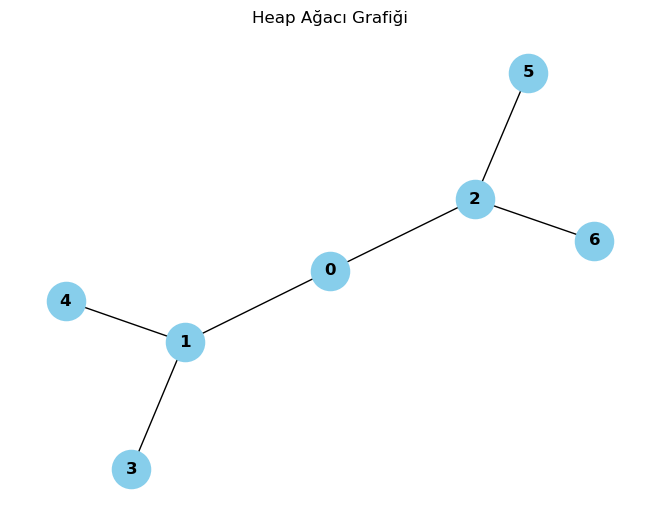

In [52]:
min_heap = {
    0: [1, 2],
    1: [3, 4],
    2: [5, 6]
}

draw_heap_tree(min_heap)


Örnek Soru 6. Bir sözlüğü temsil eden bir ağaç verildiğinde, belirli bir anahtarın ağaçta bulunup bulunmadığını kontrol eden bir Python işlevi yazın.

In [53]:
class TreeNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

def insert(root, word):
    node = root
    for char in word:
        if char not in node.children:
            node.children[char] = TreeNode()
        node = node.children[char]
    node.is_end_of_word = True

def search(root, word):
    node = root
    for char in word:
        if char not in node.children:
            return False
        node = node.children[char]
    return node.is_end_of_word

# Örnek kullanım
root = TreeNode()
words = ["apple", "banana", "orange", "grape"]
for word in words:
    insert(root, word)

print(search(root, "banana"))  
print(search(root, "kiwi"))    


True
False


Örnek Soru 7. Bir sözlüğü temsil eden ağacın tüm anahtarlarını alfabetik sıraya göre sıralayan bir Python işlevi yazın.

In [54]:
def traverse(root, prefix, result):
    if root.is_end_of_word:
        result.append(prefix)
    for char, child in root.children.items():
        traverse(child, prefix + char, result)

def sort_dictionary(root):
    result = []
    traverse(root, "", result)
    return sorted(result)

# Örnek kullanım
root = TreeNode()
words = ["apple", "banana", "orange", "grape"]
for word in words:
    insert(root, word)

print(sort_dictionary(root))


['apple', 'banana', 'grape', 'orange']


Örnek Soru 8. Bir ikili arama ağacında, verilen bir anahtarı silen bir Python işlevi yazın. Eğer anahtar ağaçta bulunmuyorsa, ağaç değişmemelidir.

In [57]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

def insert(root, key):
    if root is None:
        return TreeNode(key)
    if key < root.key:
        root.left = insert(root.left, key)
    elif key > root.key:
        root.right = insert(root.right, key)
    return root

def minValueNode(node):
    current = node
    while current.left is not None:
        current = current.left
    return current

def deleteNode(root, key):
    if root is None:
        return root
    if key < root.key:
        root.left = deleteNode(root.left, key)
    elif key > root.key:
        root.right = deleteNode(root.right, key)
    else:
        if root.left is None:
            temp = root.right
            root = None
            return temp
        elif root.right is None:
            temp = root.left
            root = None
            return temp
        temp = minValueNode(root.right)
        root.key = temp.key
        root.right = deleteNode(root.right, temp.key)
    return root

def inorder(root):
    if root:
        inorder(root.left)
        print(root.key, end=" ")
        inorder(root.right)

# Örnek kullanım
root = None
keys = [50, 30, 20, 40, 70, 60, 80]
for key in keys:
    root = insert(root, key)

print("Önceki ağaç:")
inorder(root)

root = deleteNode(root, 20)
print("\n20 anahtarı silindiğinde:")
inorder(root)

root = deleteNode(root, 30)
print("\n30 anahtarı silindiğinde:")
inorder(root)

root = deleteNode(root, 50)
print("\n50 anahtarı silindiğinde:")
inorder(root)


Önceki ağaç:
20 30 40 50 60 70 80 
20 anahtarı silindiğinde:
30 40 50 60 70 80 
30 anahtarı silindiğinde:
40 50 60 70 80 
50 anahtarı silindiğinde:
40 60 70 80 

Yukarıda verilen örneğe dair görsel çizimlerini yapmak için ilk önce ağaç yapısını çizen bir işlev tanımlıyoruz.

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_binary_tree(root):
    G = nx.DiGraph()

    def add_edges(node):
        if node is None:
            return
        if node.left:
            G.add_edge(node.key, node.left.key)
            add_edges(node.left)
        if node.right:
            G.add_edge(node.key, node.right.key)
            add_edges(node.right)

    add_edges(root)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=12, font_weight='bold', node_shape='o', linewidths=2)
    plt.title("Binary Search Tree")
    plt.show()


yukarıdaki işlevi kullanarak oluşturduğumuz ağacın belirli anahtarları silindikten sonra her aşamada güncellenmiş haline ait görselinin çizimi

Önceki ağaç:
20 30 40 50 60 70 80 

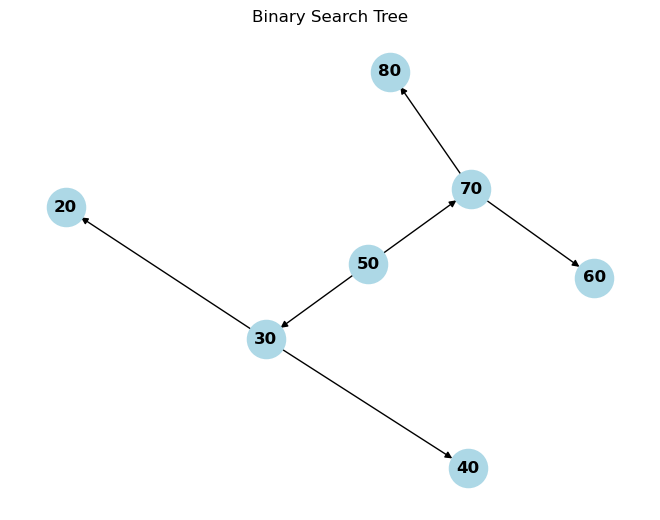


20 anahtarı silindiğinde:
30 40 50 60 70 80 

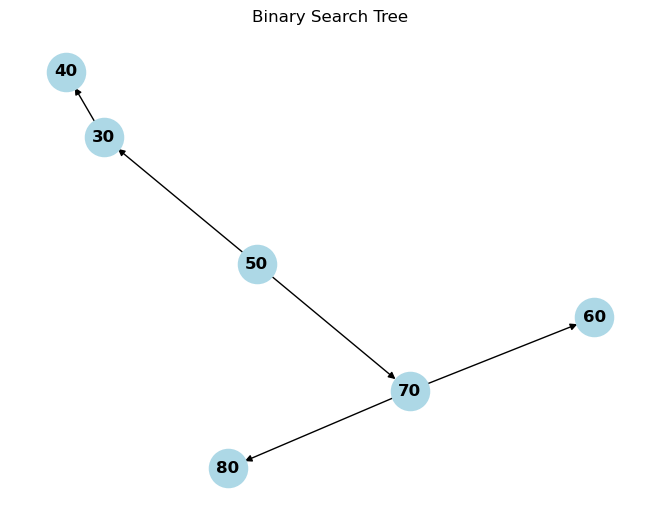


30 anahtarı silindiğinde:
40 50 60 70 80 

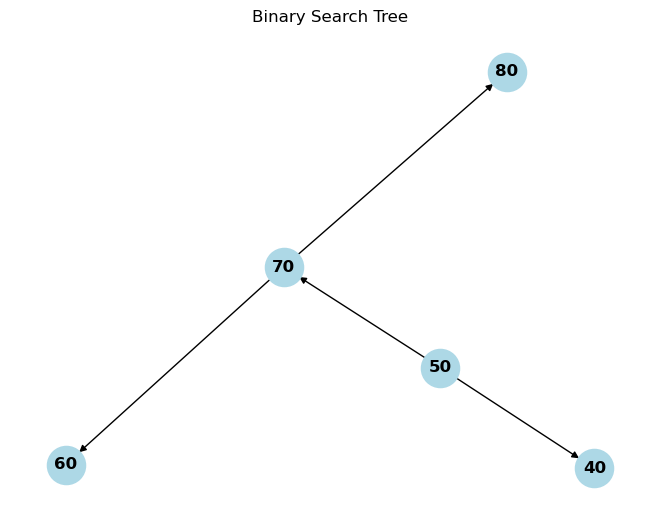


50 anahtarı silindiğinde:
40 60 70 80 

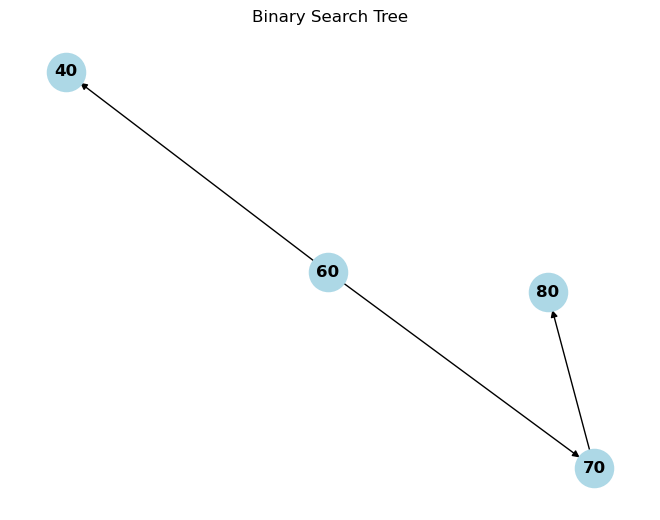

In [59]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

def insert(root, key):
    if root is None:
        return TreeNode(key)
    if key < root.key:
        root.left = insert(root.left, key)
    elif key > root.key:
        root.right = insert(root.right, key)
    return root

def minValueNode(node):
    current = node
    while current.left is not None:
        current = current.left
    return current

def deleteNode(root, key):
    if root is None:
        return root
    if key < root.key:
        root.left = deleteNode(root.left, key)
    elif key > root.key:
        root.right = deleteNode(root.right, key)
    else:
        if root.left is None:
            temp = root.right
            root = None
            return temp
        elif root.right is None:
            temp = root.left
            root = None
            return temp
        temp = minValueNode(root.right)
        root.key = temp.key
        root.right = deleteNode(root.right, temp.key)
    return root

def inorder(root):
    if root:
        inorder(root.left)
        print(root.key, end=" ")
        inorder(root.right)

# Başlangıç ağacı oluştur
root = None
keys = [50, 30, 20, 40, 70, 60, 80]
for key in keys:
    root = insert(root, key)

print("Önceki ağaç:")
inorder(root)

draw_binary_tree(root)

# Anahtarları silelim
keys_to_delete = [20, 30, 50]
for key in keys_to_delete:
    root = deleteNode(root, key)
    print(f"\n{key} anahtarı silindiğinde:")
    inorder(root)
    draw_binary_tree(root)


Örnek Soru 9. Verilen bir sözlük ağacında belirli bir anahtarın silinmesi gerekiyor. Anahtar, ağaçta bulunmuyorsa bir hata mesajı döndürülmelidir. Verilen anahtarı sözlük ağacından silen bir Python işlevi yazın

In [56]:
class TreeNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

def insert(root, word):
    node = root
    for char in word:
        if char not in node.children:
            node.children[char] = TreeNode()
        node = node.children[char]
    node.is_end_of_word = True

def search(root, word):
    node = root
    for char in word:
        if char not in node.children:
            return False
        node = node.children[char]
    return node.is_end_of_word

def delete(root, word):
    if not search(root, word):
        return "Hata: Anahtar bulunamadı!"
    node = root
    for char in word:
        node = node.children[char]
    node.is_end_of_word = False
    return "Anahtar başarıyla silindi."

# Örnek kullanım
root = TreeNode()
words = ["apple", "banana", "orange", "grape"]
for word in words:
    insert(root, word)

print(delete(root, "banana")) 
print(delete(root, "kiwi"))  


Anahtar başarıyla silindi.
Hata: Anahtar bulunamadı!
